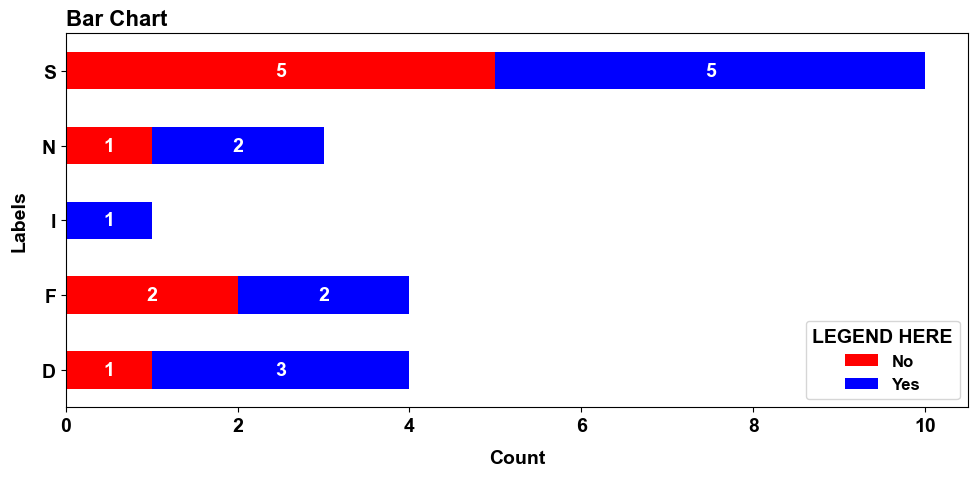

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font settings
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14, 'font.weight': 'bold'})

# Load data
df = pd.read_csv('bar_assignment.csv')
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by label and response
counts = df.groupby(['LABEL', 'Response']).size().unstack(fill_value=0)
counts = counts[['No', 'Yes']]  # Ensures "No" (red) appears first

# Create stacked horizontal bar chart
ax = counts.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(10, 5))

# Add labels inside bars
for index, (no, yes) in enumerate(zip(counts['No'], counts['Yes'])):
    if no > 0:
        plt.text(no / 2, index, str(no), ha='center', va='center', color='white', fontsize=14, fontweight='bold', fontfamily='Arial')
    if yes > 0:
        plt.text(no + yes / 2, index, str(yes), ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Add titles and labels
plt.title('Bar Chart', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('Count', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Labels', fontsize=14, fontweight='bold', labelpad=10)

# Add legend
plt.legend(title='LEGEND HERE', loc='lower right', fontsize=12, title_fontsize=14)

# Disable grid for a cleaner look
plt.grid(False)

# Optimize layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('sankey_assignment.csv')

sources = ['OMP', 'PS', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
labels = df['LABEL'].tolist()
targets = ['Reg', 'Aca', 'Oth']
nodes = sources + labels + targets

links = []
for idx, row in df.iterrows():
    label = row['LABEL']
    label_idx = nodes.index(label)
    
    for source in sources:
        value = row[source]
        if value > 0:
            source_idx = nodes.index(source)
            links.append({
                'source': source_idx,
                'target': label_idx,
                'value': value
            })
    
    for target in targets:
        value = row[target]
        if value > 0:
            target_idx = nodes.index(target)
            links.append({
                'source': label_idx,
                'target': target_idx,
                'value': value
            })

node_colors = ['rgba(19, 198, 151, 0.8)', 'rgba(253, 169, 89, 0.8)', 'rgba(255, 146, 0, 0.8)', 'rgba(169, 60, 217, 0.8)', 'rgba(255, 97, 204, 0.8)',
               'rgba(255, 234, 39, 0.8)', 'rgba(110, 194, 83, 0.8)', 'rgba(78, 255, 175, 0.8)', 'rgba(116, 219, 255, 0.8)', 'rgba(0, 189, 255, 0.8)',
               'rgba(0, 153, 142, 0.8)', 'rgba(0, 104, 153, 0.8)', 'rgba(55, 129, 255, 0.8)', 'rgba(118, 255, 131, 0.8)', 'rgba(0, 205, 70, 0.8)',
               'rgba(112, 239, 123, 0.8)']

link_colors = []
link_colors = []
for link in links:
    source_idx = link['source']
    link_colors.append(node_colors[source_idx])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        color=node_colors,
        label=nodes
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color=link_colors
    )
))

fig.update_layout(title_text="Sankey Diagram", font_size=14, font_weight='bold')
fig.show()

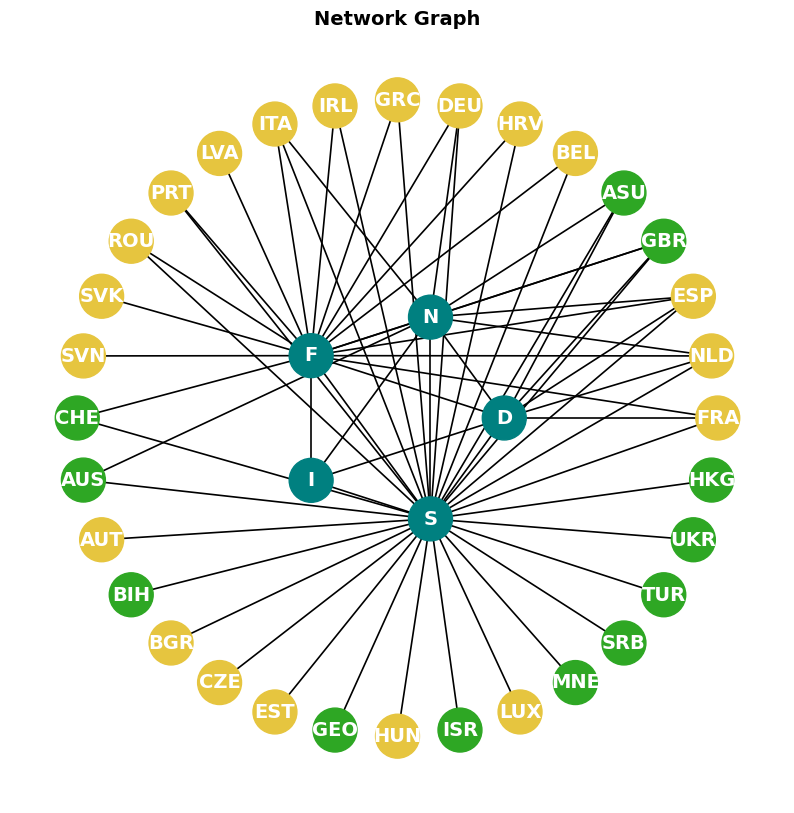

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('networks_assignment.csv')

row_labels = {'D', 'F', 'I', 'N', 'S'}

G = nx.Graph()
for index, row in df.iterrows():
    src = row['LABELS']
    G.add_node(src, group='row' if src in row_labels else 'col')
    
    for col in df.columns[1:]:
        val = row[col]
        if val > 0:
            G.add_node(col, group='row' if col in row_labels else 'col')
            G.add_edge(src, col, weight=val)

row_nodes = [n for n, d in G.nodes(data=True) if d['group'] == 'row']
col_nodes = [n for n, d in G.nodes(data=True) if d['group'] == 'col']

def circle_layout(nodes, radius):
    angles = np.linspace(0, 2 * np.pi, len(nodes), endpoint=False)
    return {n: (radius * np.cos(a), radius * np.sin(a)) for n, a in zip(nodes, angles)}

pos = {**circle_layout(row_nodes, 0.5), **circle_layout(col_nodes, 1.5)}

countries_a = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA',
                         'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX',
                         'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

countries_b = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR',
                         'UKR', 'GBR', 'AUS', 'HKG', 'USA', 'ASU']

group_one   = (230/255, 197/255, 63/255, 1)  # yellow
group_two   = (46/255, 167/255, 36/255, 1)   # green
default_row_color = 'teal'

node_colors = {}
for node, data in G.nodes(data=True):
    if node in countries_a:
        node_colors[node] = group_one
    elif node in countries_b:
        node_colors[node] = group_two
    else:
        node_colors[node] = default_row_color

plt.figure(figsize=(10, 10))
all_nodes = list(G.nodes())
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=all_nodes,
    node_color=[node_colors[n] for n in all_nodes],
    node_size=1000
)
nx.draw_networkx_edges(G, pos, width=1.2, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=14, font_color='white', font_weight='bold')

plt.title("Network Graph", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()